Brand: Blinkit
Positive: 2507
Negative: 1488
Neutral: 1230
Total: 5225
NBR Score: 19.5024


Brand: Bigbasket
Positive: 1166
Negative: 803
Neutral: 569
Total: 2538
NBR Score: 14.3026


Brand: Zepto
Positive: 1165
Negative: 726
Neutral: 639
Total: 2530
NBR Score: 17.3518


Brand: Swiggy Instamart
Positive: 985
Negative: 729
Neutral: 591
Total: 2305
NBR Score: 11.1063




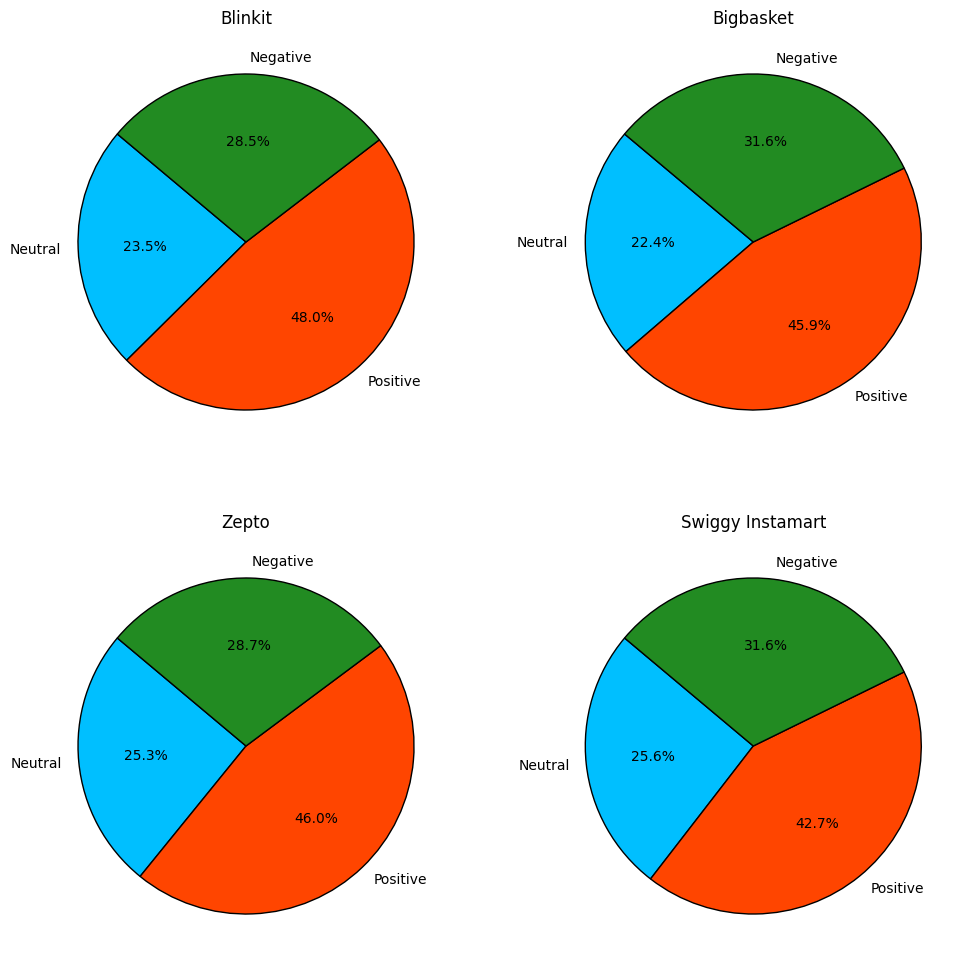

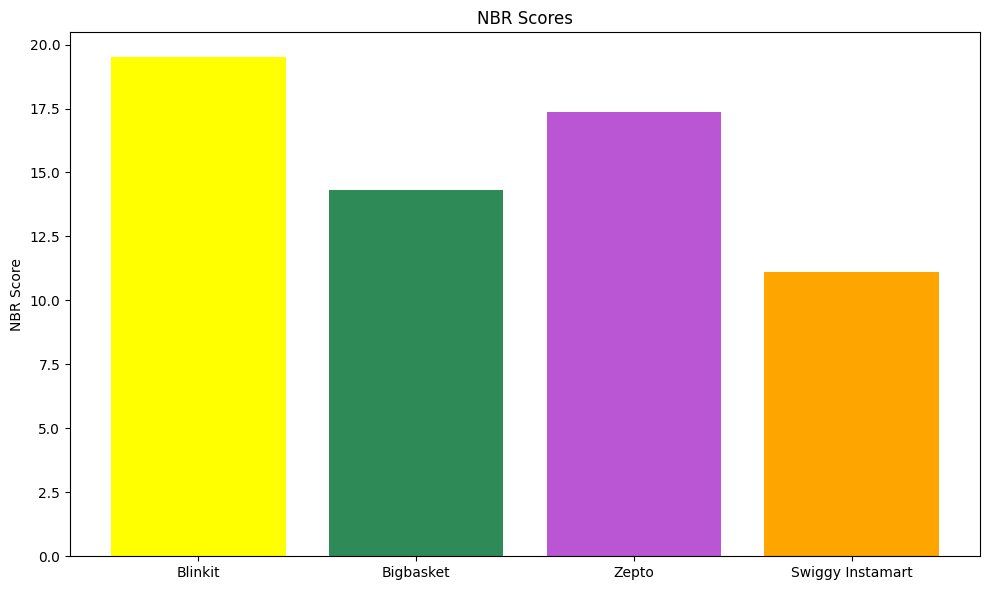

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_nbr_score(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Assuming the CSV has a column 'sentiment' with values 'Positive', 'Negative', 'Neutral'
    sentiment_counts = df['sentiment'].value_counts()
    
    # Get counts for each sentiment
    positive_count = sentiment_counts.get('Positive', 0)
    negative_count = sentiment_counts.get('Negative', 0)
    neutral_count = sentiment_counts.get('Neutral', 0)
    
    # Total number of tweets
    total_count = positive_count + negative_count + neutral_count
    
    # Calculate NBR score
    nbr_score = (positive_count - negative_count) * 100 / total_count if total_count != 0 else 0
    
    return positive_count, negative_count, neutral_count, total_count, nbr_score

# File paths for the CSV files
files = {
    'Blinkit': 'blinkit_processed_tweets.csv',
    'Bigbasket': 'bigbasket_processed_tweets.csv',
    'Zepto': 'zepto_processed_tweets.csv',
    'Swiggy Instamart': 'swiggyinstamart_processed_tweets.csv'
}

# Dictionary to store the results
results = {}

# Calculate NBR score for each brand
for brand, file_path in files.items():
    pos, neg, neu, total, nbr = calculate_nbr_score(file_path)
    results[brand] = {
        'positive': pos,
        'negative': neg,
        'neutral': neu,
        'total': total,
        'nbr_score': nbr
    }

# Display the results
for brand, data in results.items():
    print(f"Brand: {brand}")
    print(f"Positive: {data['positive']}")
    print(f"Negative: {data['negative']}")
    print(f"Neutral: {data['neutral']}")
    print(f"Total: {data['total']}")
    print(f"NBR Score: {data['nbr_score']:.4f}")
    print("\n")

# Plotting
brands = list(results.keys())
positive_counts = [results[brand]['positive'] for brand in brands]
negative_counts = [results[brand]['negative'] for brand in brands]
neutral_counts = [results[brand]['neutral'] for brand in brands]
nbr_scores = [results[brand]['nbr_score'] for brand in brands]

# Colors for the pie charts
pie_colors = ['deepskyblue', 'orangered', 'forestgreen']

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax = ax.flatten()

# Pie charts for sentiment counts
for i, brand in enumerate(brands):
    sizes = [neutral_counts[i], positive_counts[i], negative_counts[i]]
    labels = ['Neutral', 'Positive', 'Negative']
    ax[i].pie(sizes, labels=labels, autopct='%1.1f%%', colors=pie_colors, startangle=140, wedgeprops={'edgecolor': 'black'})
    ax[i].set_title(f'{brand}')

# Bar plot for NBR scores
fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.bar(brands, nbr_scores, color=['yellow', 'seagreen', 'mediumorchid', 'orange'])
ax2.set_ylabel('NBR Score')
ax2.set_title('NBR Scores')

plt.tight_layout()
plt.show()
